In [1]:
from pathlib import Path
import mgmGrowth.utils.flair2nrrd as flair2nrrd

root   = Path("/home/mariopasc/Python/Datasets/Meningiomas/men")
outdir = Path("/home/mariopasc/Python/Datasets/Meningiomas/Meningioma_Adquisition/RM")

df = flair2nrrd.batch_convert_flair(root, outdir)
df.head()


WARNING | Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
/home/mariopasc/Python/misc/miniconda3/envs/mgmGrowth/lib/python3.10/site-packages/pydicom/valuerep.py:440: UserWarning: Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warn_and_log(msg)
WARNING | Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
WARNING | Invalid value for VR UI: '1.2.840.113704.7.01.164.66376,1640104.15'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
WARNING | Invalid value for VR UI: '1.2.840.11370

,PatientID,Written,Slices,VoxelSpacing,DirectionDet,OutFile,Copied,Reason
0,P1,True,20.0,"(0.8984375, 0.8984374999999999, 2.5263158702795)",1.0,/home/mariopasc/Python/Datasets/Meningiomas/Me...,NaN,NaN
1,P12,True,NaN,NaN,NaN,/home/mariopasc/Python/Datasets/Meningiomas/Me...,True,copied_existing
2,P14,True,NaN,NaN,NaN,/home/mariopasc/Python/Datasets/Meningiomas/Me...,True,copied_existing
3,P15,True,NaN,NaN,NaN,/home/mariopasc/Python/Datasets/Meningiomas/Me...,True,copied_existing
4,P16,True,NaN,NaN,NaN,/home/mariopasc/Python/Datasets/Meningiomas/Me...,True,copied_existing


Image Statistics:


,Registered T1,Template T1
mean,33.708172,303.138633
std,107.211465,399.289505
min,0.0,0.0
max,1021.109253,3795.0
shape,"(240, 240, 155)","(240, 240, 155, 1)"


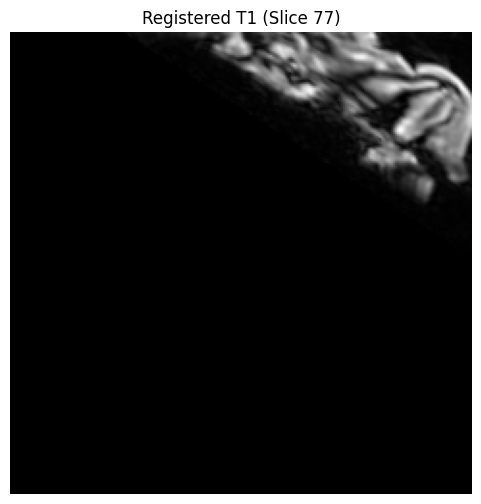

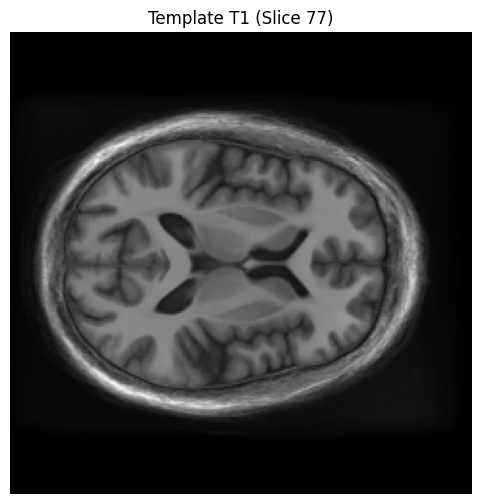

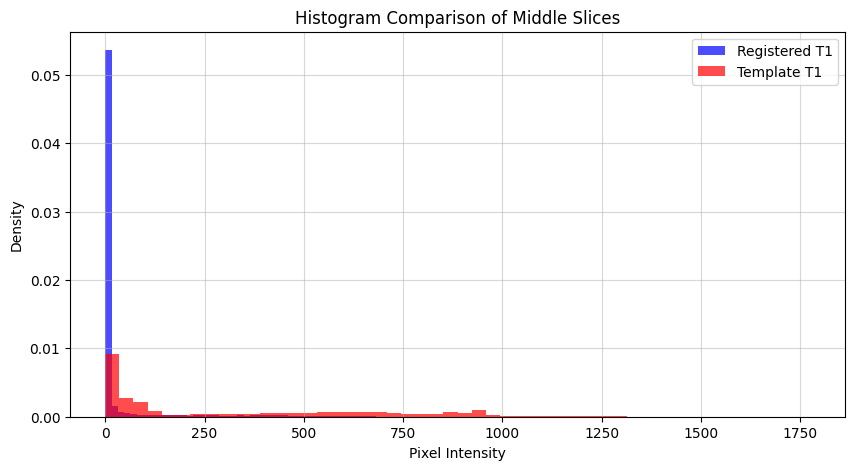

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import os

reg_t1 = nib.load("/home/mariopasc/Python/Datasets/Meningiomas/tests/P1/results/T1_P1_atlas.nii.gz").get_fdata()
template_t1 = nib.load("/home/mariopasc/Python/Datasets/Meningiomas/ATLAS/sri24_spm8/templates/T1.nii").get_fdata()

# Calculate statistics
stats_reg_t1 = {
    'mean': np.mean(reg_t1),
    'std': np.std(reg_t1),
    'min': np.min(reg_t1),
    'max': np.max(reg_t1),
    'shape': reg_t1.shape
}

stats_template_t1 = {
    'mean': np.mean(template_t1),
    'std': np.std(template_t1),
    'min': np.min(template_t1),
    'max': np.max(template_t1),
    'shape': template_t1.shape
}

# Create DataFrame for statistics
stats_df = pd.DataFrame({'Registered T1': stats_reg_t1, 'Template T1': stats_template_t1})
print("Image Statistics:")
display(stats_df)

# Get middle slices
mid_slice_idx_reg = reg_t1.shape[2] // 2
mid_slice_reg = reg_t1[:, :, mid_slice_idx_reg]

mid_slice_idx_template = template_t1.shape[2] // 2
mid_slice_template = template_t1[:, :, mid_slice_idx_template]

# Plot Registered T1 separately
plt.figure(figsize=(6, 6))
plt.imshow(mid_slice_reg, cmap='gray')
plt.title(f'Registered T1 (Slice {mid_slice_idx_reg})')
plt.axis('off')
plt.show()

# Plot Template T1 separately
plt.figure(figsize=(6, 6))
plt.imshow(mid_slice_template, cmap='gray')
plt.title(f'Template T1 (Slice {mid_slice_idx_template})')
plt.axis('off')
plt.show()

# Compare histograms
plt.figure(figsize=(10, 5))
plt.hist(mid_slice_reg.ravel(), bins=50, color='blue', alpha=0.7, density=True, label='Registered T1')
plt.hist(mid_slice_template.ravel(), bins=50, color='red', alpha=0.7, density=True, label='Template T1')
plt.title('Histogram Comparison of Middle Slices')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()